<a href="https://colab.research.google.com/github/goginyanboris/VKR/blob/scripts_to_compare/Copy_PSNR_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive')
#drive.flush_and_unmount()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


##Функции и метрики

In [25]:
import numpy as np 
import math, os

import cv2
#import os

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

from skimage import exposure, color, metrics
from skimage.io import imread, imshow, imsave


# метод нормализации яркости изображения
def hisEqulColor(img, returnBRG = False):
    ycrcb=cv2.cvtColor(img, cv2.COLOR_BGR2YCR_CB)
    channels=cv2.split(ycrcb)
    #print(channels)
    cv2.equalizeHist(channels[0],channels[0])
    cv2.merge(channels, ycrcb)
    if returnBRG:
        cv2.cvtColor(ycrcb,cv2.COLOR_YCR_CB2BGR,img)
        return img
    return ycrcb

def psnrSpeed(arr):
    speed = []
    for i in range(len(arr)-1):
        speed.append(arr[i+1]-arr[i])
    return np.mean(speed)
    
'''
def l1(img):  # сумма эл столбцов
  #img = img1 - img2
  summ = [0 for i in range(len(img[0]))]
  maxbgr = []
  for k in range (3): # BGR
    for j in range(len(img[0])): # длина
      summ[j] = sum(abs(img[:,j][k]))
    # print(len(img[0]))
    maxbgr.append(max(summ))
  return maxbgr

def lmax(img):  # сумма эл строк
  #img = img1 - img2
  summ = [0 for i in range(len(img))]
  maxbgr = []
  for k in range (3): # BGR
    for i in range(len(img)): # ширина
      summ[i] = sum(abs(img[i,:][k]))
    # print(len(img))
    maxbgr.append(max(summ))
  return maxbgr

  # запись в таблицу результатов сравнения
k=0
i = 0
for img in A0_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "appleseed", A0_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

i = 0
for img in A1_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "cycles", A1_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

i = 0
for img in A3_images:
  img = hisEqulColor(img)
  img_table.loc[k]= ["A", "luxcore", A3_times[i], measure.compare_psnr(Aimg, img, data_range=None)]
  i+=1
  k+=1

# img_table '''



'\ndef l1(img):  # сумма эл столбцов\n  #img = img1 - img2\n  summ = [0 for i in range(len(img[0]))]\n  maxbgr = []\n  for k in range (3): # BGR\n    for j in range(len(img[0])): # длина\n      summ[j] = sum(abs(img[:,j][k]))\n    # print(len(img[0]))\n    maxbgr.append(max(summ))\n  return maxbgr\n\ndef lmax(img):  # сумма эл строк\n  #img = img1 - img2\n  summ = [0 for i in range(len(img))]\n  maxbgr = []\n  for k in range (3): # BGR\n    for i in range(len(img)): # ширина\n      summ[i] = sum(abs(img[i,:][k]))\n    # print(len(img))\n    maxbgr.append(max(summ))\n  return maxbgr\n\n  # запись в таблицу результатов сравнения\nk=0\ni = 0\nfor img in A0_images:\n  img = hisEqulColor(img)\n  img_table.loc[k]= ["A", "appleseed", A0_times[i], measure.compare_psnr(Aimg, img, data_range=None)]\n  i+=1\n  k+=1\n\ni = 0\nfor img in A1_images:\n  img = hisEqulColor(img)\n  img_table.loc[k]= ["A", "cycles", A1_times[i], measure.compare_psnr(Aimg, img, data_range=None)]\n  i+=1\n  k+=1\n\ni = 0\

In [0]:
img = cv2.imread('/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/A2_12_thread/A0_854_samp_1039.783.png')

dst = cv2.fastNlMeansDenoisingColored(img,None,5,5,7,21)

imsave("/content/drive/My Drive/Диплом/A Glass/Aetalon.png", dst)

##Условные обозначения

>0 - appleseed \\
1 - Cycles \\
2 - LuxCore \\



##A_Glass
###A0_appleseed

In [0]:
img_table = pd.DataFrame({
    'scene number':[],
    'render name': [],
    'rendering time (sec)':[],
    'psnr (dB)':[],
})

Aetalon = imread("/content/drive/My Drive/Диплом/A Glass/Aetalon.png")
#Aetalon = hisEqulColor(Aetalon)

# A0 appleseed 6 treads 
A0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_25_samp_282.534_seconds_var=0.007767.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_52_samp_551.179_sec_var=3.29532.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_156_samp_1519.7081_sec_var=10.995.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/6 threads/A0_370_samp3337.4497_sec_var= 166.618.png"]] 
                             #    "/content/drive/My Drive/Диплом/A Glass/0 Appleseed_sppm/A0_11952.437.png"]] 

A0_6treadsTimes = [282.534, 551.179, 1519.7081, 3337.4497]

# A0 appleseed 12 treads

A0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_25_samp_187.660_sec_var=0.1818.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_52_samp_371.166_sec_var=.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_156_samp_ 1033.1634_sec_var=4.565.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A0_appleseed/12 threads/A0_600samp_2304.6446356773376 var= 0.21412804828711765.png"]] # 370 samples

A0_12treadsTimes = [187.660, 371.166, 1033.1634, 2304.6446]

# -----------------------------------------------------------------------------------------------------------
#
# A1 Cycles 6 treads

A1_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A1_Cycles/6 treads/A1_17_6tr_291.14783453941345 var= 0.2151.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/6 treads/A1_32s_6tr_546.9591248035431 var= 15.801.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/6 treads/A1_89s_6tr_1518.70556751887 var= 29.21.png", 
                                  "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/6 treads/A1_195s_6tr_ 3338.16.png"
                                ]]

A1_6treadsTimes = [291.14784, 546.95913, 1518.705568, 3338.16]

# A1 Cycles 12 treads
A1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A1_Cycles/12 treads/A1_17_12tr_ 183.015863 var= 0.98.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/12 treads/A1_32_12tr_ 346.0087.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/12 treads/A1_89_12tr_961.741.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A1_Cycles/12 treads/A1_195_12tr_2112.85959.png"
                                ]]

A1_12treadsTimes = [183.015863, 346.0087, 961.741, 2112.85959]

# -----------------------------------------------------------------------------------------------------------
#
# A2 Luxcore 6 treads
A2_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/6 treads/A0_148__samp_291.571_var0.00233.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/6 treads/A0_293_samp_552.746_var0.0151.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/6 treads/A0_854_samp_1519.642_var3.965.png", 
                                 "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/6 treads/A0_1898_samp_3306.363_var0.00036.png", 
                                ]]

A2_6treadsTimes = [291.571, 552.746, 1519.642, 3306.363]

# A2 Luxcore 12 treads

A2_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/A2_12_thread/A0_148__samp_194.963.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/A2_12_thread/A0_293_samp_ 376.126.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/A2_12_thread/A0_854_samp_1039.783.png", 
                                   "/content/drive/My Drive/Диплом/A Glass/A2_LuxCore/A2_12_thread/A0_1898_samp_2278.36_var297.839.png", 
                                ]]

A2_12treadsTimes = [194.963, 376.126, 1039.783, 2278.36]

# skimage.metrics.peak_signal_noise_ratio(image_true, image_test, *, data_range=None) '''



In [0]:
A0_6psnr = []
for img in A0_6treads:
    img = hisEqulColor(img)
    A0_6psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))

A0_12psnr = []
for img in A0_12treads:
    img = hisEqulColor(img)
    A0_12psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))  

A0_6_12_proc = []
for i in range(len(A0_6treadsTimes)):
    A0_6_12_proc.append(A0_12treadsTimes[i] /A0_6treadsTimes[i] * 100 )

# cycles
A1_6psnr = []
for img in A1_6treads:
    img = hisEqulColor(img)
    A1_6psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))

A1_12psnr = []
for img in A1_12treads:
    img = hisEqulColor(img)
    A1_12psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))  

A1_6_12_proc = []
for i in range(len(A1_6treadsTimes)):
    A1_6_12_proc.append(A1_12treadsTimes[i] /A1_6treadsTimes[i] * 100 )

# luxcore 
A2_6psnr = []
for img in A2_6treads:
    img = hisEqulColor(img)
    A2_6psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))

A2_12psnr = []
for img in A2_12treads:
    img = hisEqulColor(img)
    A2_12psnr.append(metrics.peak_signal_noise_ratio(Aetalon, img))  

A2_6_12_proc = []
for i in range(len(A2_6treadsTimes)):
    A2_6_12_proc.append(A2_12treadsTimes[i] /A2_6treadsTimes[i] * 100 )
#--------------------------------------------------------------------------------

plt.figure(num=None, figsize=(8, 8), dpi=512, facecolor='w', edgecolor='k')
ax = plt.subplot()

# appleseed
#ax.plot(A0_6treadsTimes, A0_6psnr, color = 'r', label="6 tr appleseed")
#ax.plot(A0_12treadsTimes, A0_12psnr, color = 'orange', label="12 treads")
ax.plot(A0_12treadsTimes, A0_6_12_proc, color = 'r', label="12/6 appleseed")

# cycles
#ax.plot(A1_6treadsTimes, A1_6psnr, color = 'y', label="6 tr cycles")
#ax.plot(A1_12treadsTimes, A1_12psnr, color = 'orange', label="12 treads")
ax.plot(A1_12treadsTimes, A1_6_12_proc, color = 'y', label="12/6 cycles")

# luxcore
#ax.plot(A2_6treadsTimes, A2_6psnr, color = 'royalblue', label="6 tr luxcore")
#ax.plot(A1_12treadsTimes, A1_12psnr, color = 'orange', label="12 treads")
ax.plot(A2_12treadsTimes, A2_6_12_proc, color = 'royalblue', label="12/6 luxcore")


plt.legend()
#ax.set(title='psnr')
ax.set(title='procent')

plt.xlabel("Секунды\n")

ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 5,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 0.5,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 35)    #  Поворот подписей

#plt.ylabel("dB")
plt.ylabel("%")

meantime = []
for i in range(len(A0_6treadsTimes)):
    meantime.append(np.mean([A0_12treadsTimes[i], A1_12treadsTimes[i], A2_12treadsTimes[i]]))

plt.xticks(meantime[:-1] + [A1_12treadsTimes[-1]] + [A2_12treadsTimes[-1]])
#plt.xticks(A0_6treadsTimes)

#plt.yticks(np.sort(A0_6_12_proc + A1_6_12_proc + A2_6_12_proc))
#plt.yticks(A0_6_12_proc)


plt.grid()
plt.show()

# Сцена В

In [0]:
Betalon = imread("/content/drive/My Drive/Диплом/B_Bottles/B_etalon.png")
dst = hisEqulColor(Betalon)

Betalon = cv2.fastNlMeansDenoisingColored(dst, None, 5, 5, 7, 21)

# A0 appleseed 6 treads 
B0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_7__6tr_662.2328.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_14_6tr_1303.457.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_27__6tr_2525.39.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/6 treads/B0_54__6tr_5091.939.png"]] 
                             #    "/content/drive/My Drive/Диплом/A Glass/0 Appleseed_sppm/A0_11952.437.png"]] 

B0_6treadsTimes = [662.232, 1303.457, 2525.39, 5091.939]

# B0 appleseed 12 treads

B0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_7__12tr_420.4077.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_14_12tr_863.1535.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_27__12tr_ 1596.9861.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B0_appleseed/12 treads/B0_54__12tr_3186.8176.png"]] # 370 samples

B0_12treadsTimes = [420.4077, 863.1535, 1596.9861, 3186.8176]

# -----------------------------------------------------------------------------------------------------------
#
# B1 Cycles 6 treads

B1_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/6 treads/A1_36__6tr_665.976.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/6 treads/A1_72_6tr_1335.427.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/6 treads/A1_139_6tr_2571.619.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/6 treads/A1_280_6tr_5126.730.png"
                                ]]

B1_6treadsTimes = [665.976, 1335.427, 2571.619, 5126.730]

# A1 Cycles 12 treads
B1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/12 treads/B1_36_12tr_406.1995.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/12 treads/B1_72_12tr_803.3183.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/12 treads/B1_139_12tr_1546.621.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B1_Cycles/12 treads/B1_280_12tr_3132.939.png" 
                                ]]

B1_12treadsTimes = [406.1995, 803.3183, 1546.621, 3132.939]

# -----------------------------------------------------------------------------------------------------------
#
# B2 Luxcore 6 treads

B2_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_88_6tr_656.302.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_173_6tr_1365.769.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_335_6tr_2661.068.png", 
                                  "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/6 treads/B2_676_6tr5324.674.png"
                                ]]

B2_6treadsTimes = [656.302, 1365.769, 2661.068, 5324.674]

# B2 Luxcore 12 treads

B2_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_88_12tr_421.0408.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_173_12tr_ 862.5259.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_335_12tr_1645.670.png", 
                                   "/content/drive/My Drive/Диплом/B_Bottles/B2_LuxCore/12 treads/B2_676_12tr_3291.636.png" 
                                ]]

B2_12treadsTimes = [421.04, 862.5259, 1645.670, 3291.636]

# skimage.metrics.peak_signal_noise_ratio(image_true, image_test, *, data_range=None) 



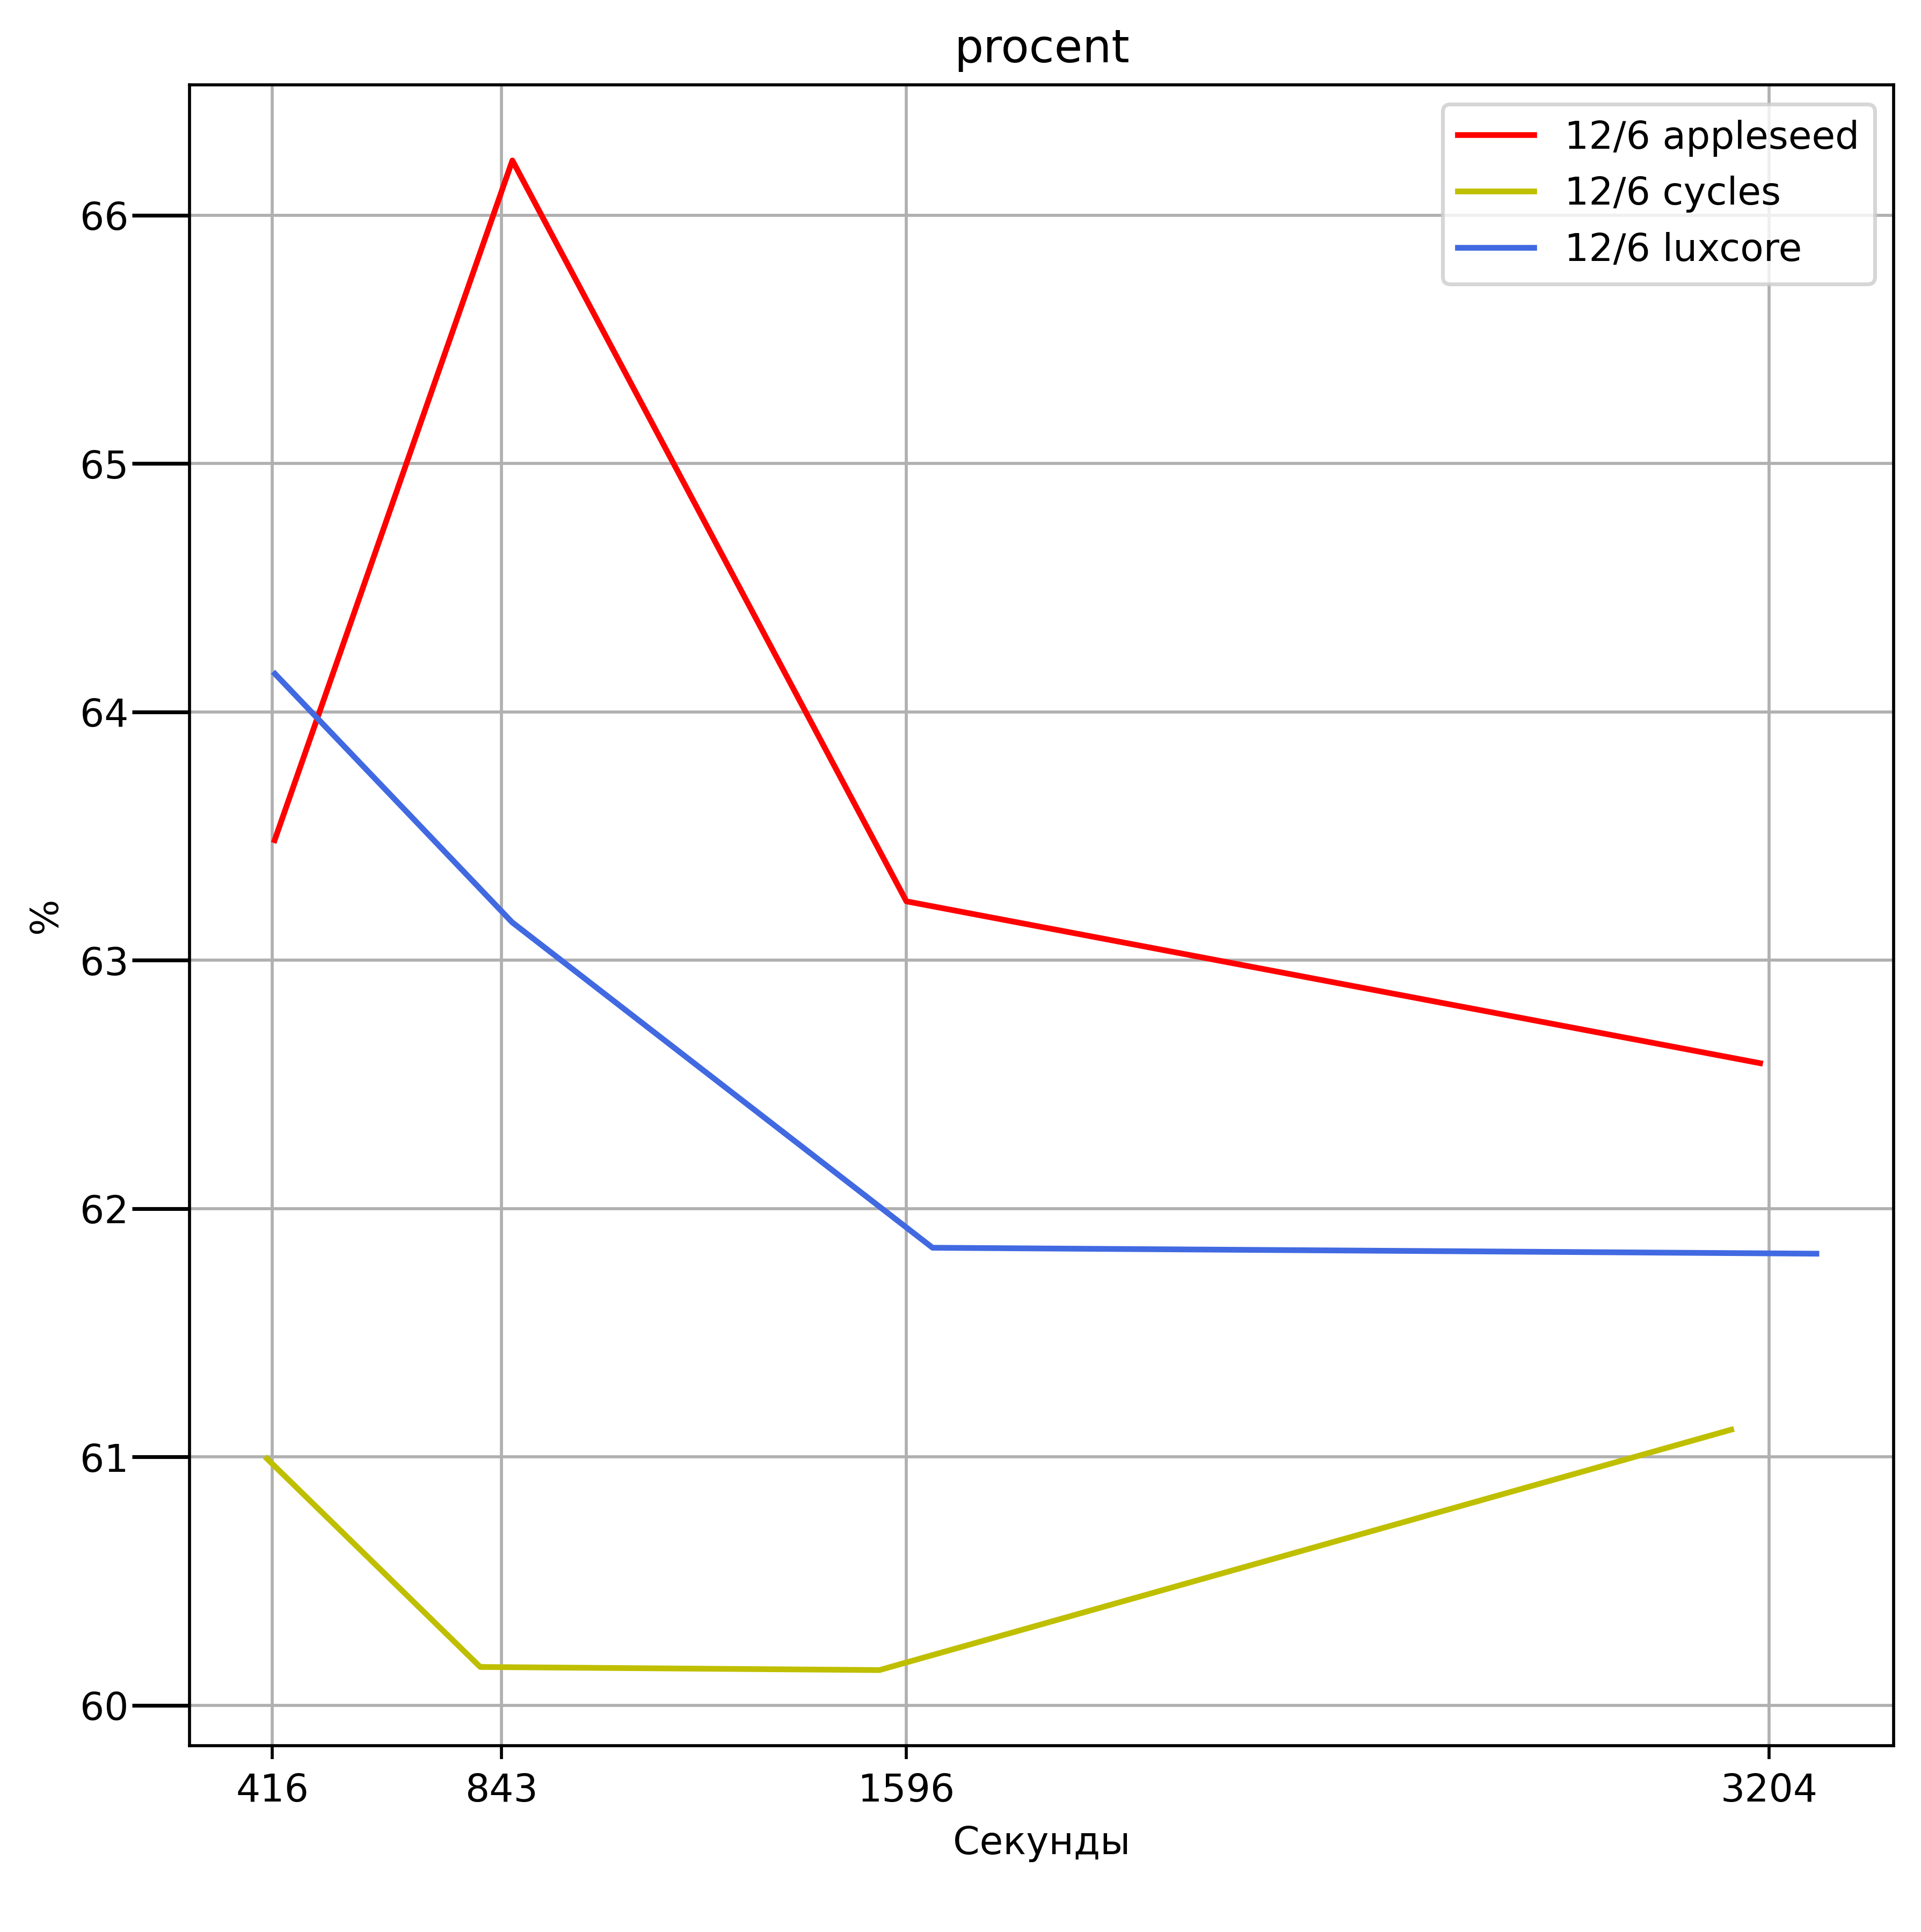

In [0]:
# appleseed --------------------------
B0_6psnr = []
for img in B0_6treads:
    img = hisEqulColor(img)
    B0_6psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))

B0_12psnr = []
for img in B0_12treads:
    img = hisEqulColor(img)
    B0_12psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))  

B0_6_12_proc = []
for i in range(len(B0_6psnr)):
    B0_6_12_proc.append(B0_12treadsTimes[i] /B0_6treadsTimes[i] * 100 )

# cycles -------------------------------
B1_6psnr = []
for img in B1_6treads:
    img = hisEqulColor(img)
    B1_6psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))

B1_12psnr = []
for img in B1_12treads:
    img = hisEqulColor(img)
    B1_12psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))

B1_6_12_proc = []
for i in range(len(B1_6psnr)):
    B1_6_12_proc.append(B1_12treadsTimes[i] /B1_6treadsTimes[i] * 100 )

# luxcore ------------------------------
B2_6psnr = []
for img in B2_6treads:
    img = hisEqulColor(img)
    B2_6psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))

B2_12psnr = []
for img in B2_12treads:
    img = hisEqulColor(img)
    B2_12psnr.append(metrics.peak_signal_noise_ratio(Betalon, img))  

B2_6_12_proc = []
for i in range(len(B2_6psnr)):
    B2_6_12_proc.append(B2_12treadsTimes[i] /B2_6treadsTimes[i] * 100 )


plt.figure(num=None, figsize=(8, 8), dpi=512, facecolor='w', edgecolor='k')
ax = plt.subplot()

# appleseed
#ax.plot(B0_6treadsTimes, B0_6psnr, color = 'r', label="6 tr appleseed")
#ax.plot(B0_12treadsTimes, B0_12psnr, color = 'orange', label="12 treads")
ax.plot(B0_12treadsTimes, B0_6_12_proc, color = 'r', label="12/6 appleseed")

# cycles
#ax.plot(B1_6treadsTimes, B1_6psnr, color = 'y', label="6 tr cycles")
#ax.plot(B1_12treadsTimes, B1_12psnr, color = 'orange', label="12 treads")
ax.plot(B1_12treadsTimes, B1_6_12_proc, color = 'y', label="12/6 cycles")

# luxcore
#ax.plot(B2_6treadsTimes, B2_6psnr, color = 'royalblue', label="6 tr luxcore")
#ax.plot(B1_12treadsTimes, B1_12psnr, color = 'orange', label="12 treads")
ax.plot(B2_12treadsTimes, B2_6_12_proc, color = 'royalblue', label="12/6 luxcore")


plt.legend()
#ax.set(title='psnr')
ax.set(title='procent')

plt.xlabel("Секунды\n")

ax.tick_params(axis = 'y',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 0)    #  Поворот подписей

#plt.ylabel("dB")
plt.ylabel("%")

meantime = []
for i in range(len(B0_6treadsTimes)):
    meantime.append(np.mean([B0_12treadsTimes[i], B1_12treadsTimes[i], B2_12treadsTimes[i]]))

plt.xticks(meantime)
#plt.xticks(A0_6treadsTimes)

#plt.yticks(np.sort(B1_6psnr + B2_6psnr))
#plt.yticks(A0_6_12_proc)


plt.grid()
plt.show()

##C tranclucent curtains

In [0]:
Cetalon = imread("/content/drive/My Drive/Диплом/C_tranclucent_curtains/C_etalon.png")
Cetalon = hisEqulColor(Cetalon)

#dst = hisEqulColor(Cetalon)
#Cetalon = cv2.fastNlMeansDenoisingColored(dst, None, 5, 5, 7, 21)

# A0 appleseed 6 treads 
'''
C0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/"
                                  ]]

C0_6treadsTimes = []'''

# B0 appleseed 12 treads

C0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_5_12tr_ 1319.8860.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_10_12tr_2599.369.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_20_12tr_5122.735.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_40_12tr_10386.971.png"
                                   ]]

C0_12treadsTimes = [1319.886, 2599.369, 5122.735, 10386.971]

# -----------------------------------------------------------------------------------------------------------
#
# B1 Cycles 6 treads
'''

# изображения с меньшим кол-вом итераций
C1_12treadsLow = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_170_12tr_183.381.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_334_12tr_354.2279.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_658_12tr_691.2025.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/С1_1265_12tr_1302.165.png",
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_1335_12tr_1393.2081.png"
                                     ]]

C1_12treadsTimesLow = [183.381, 354.2279, 691.2025, 1302.165, 1393.2081] '''

# A1 Cycles 12 treads
C1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_1333_12tr_1321.4227.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_2624_12tr_2600.242.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_5172_12tr_5122.2.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_10486_12tr_10387.061.png" 
                                  ]]

C1_12treadsTimes = [1321.4227, 2600.242, 5122.2, 10387.061]


# -----------------------------------------------------------------------------------------------------------
#
# B2 Luxcore 6 treads
'''
C2_6treads = [imread(i) for i in [""/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/"
                                 ]]

C2_6treadsTimes = [] '''

# B2 Luxcore 12 treads
C2_12treadsPath = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 threads path tracing/С2_1058_12tr_1319.924.png", 
                                       "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 threads path tracing/С2_2084_12tr_2599.914.png", 
                                       "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 threads path tracing/С2_4106_12tr_5122.481.png", 
                                       "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 threads path tracing/С2_8326_12tr_10387.256.png" 
                                      ]]

C2_12treadsTimesPath = [1319.924, 2599.914, 5122.481, 10387.256]

C2_12treadsBidir = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_401_12tr_1326.152.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_789_12tr_2614.972.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_1556_12tr_5111.92.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_3145_12tr_ 11455.515.png" 
                                       ]]

C2_12treadsTimesBidir = [1326.152, 2614.972, 5111.92, 11455.515]

средняя скорость алгоритма: 
appleseed path tr: 1.574285508527473 
cycles path tr: 0.06499387815922948
luxcore bidir pt: 0.035493223607254265 
luxcore path tr: 0.036992305172886354


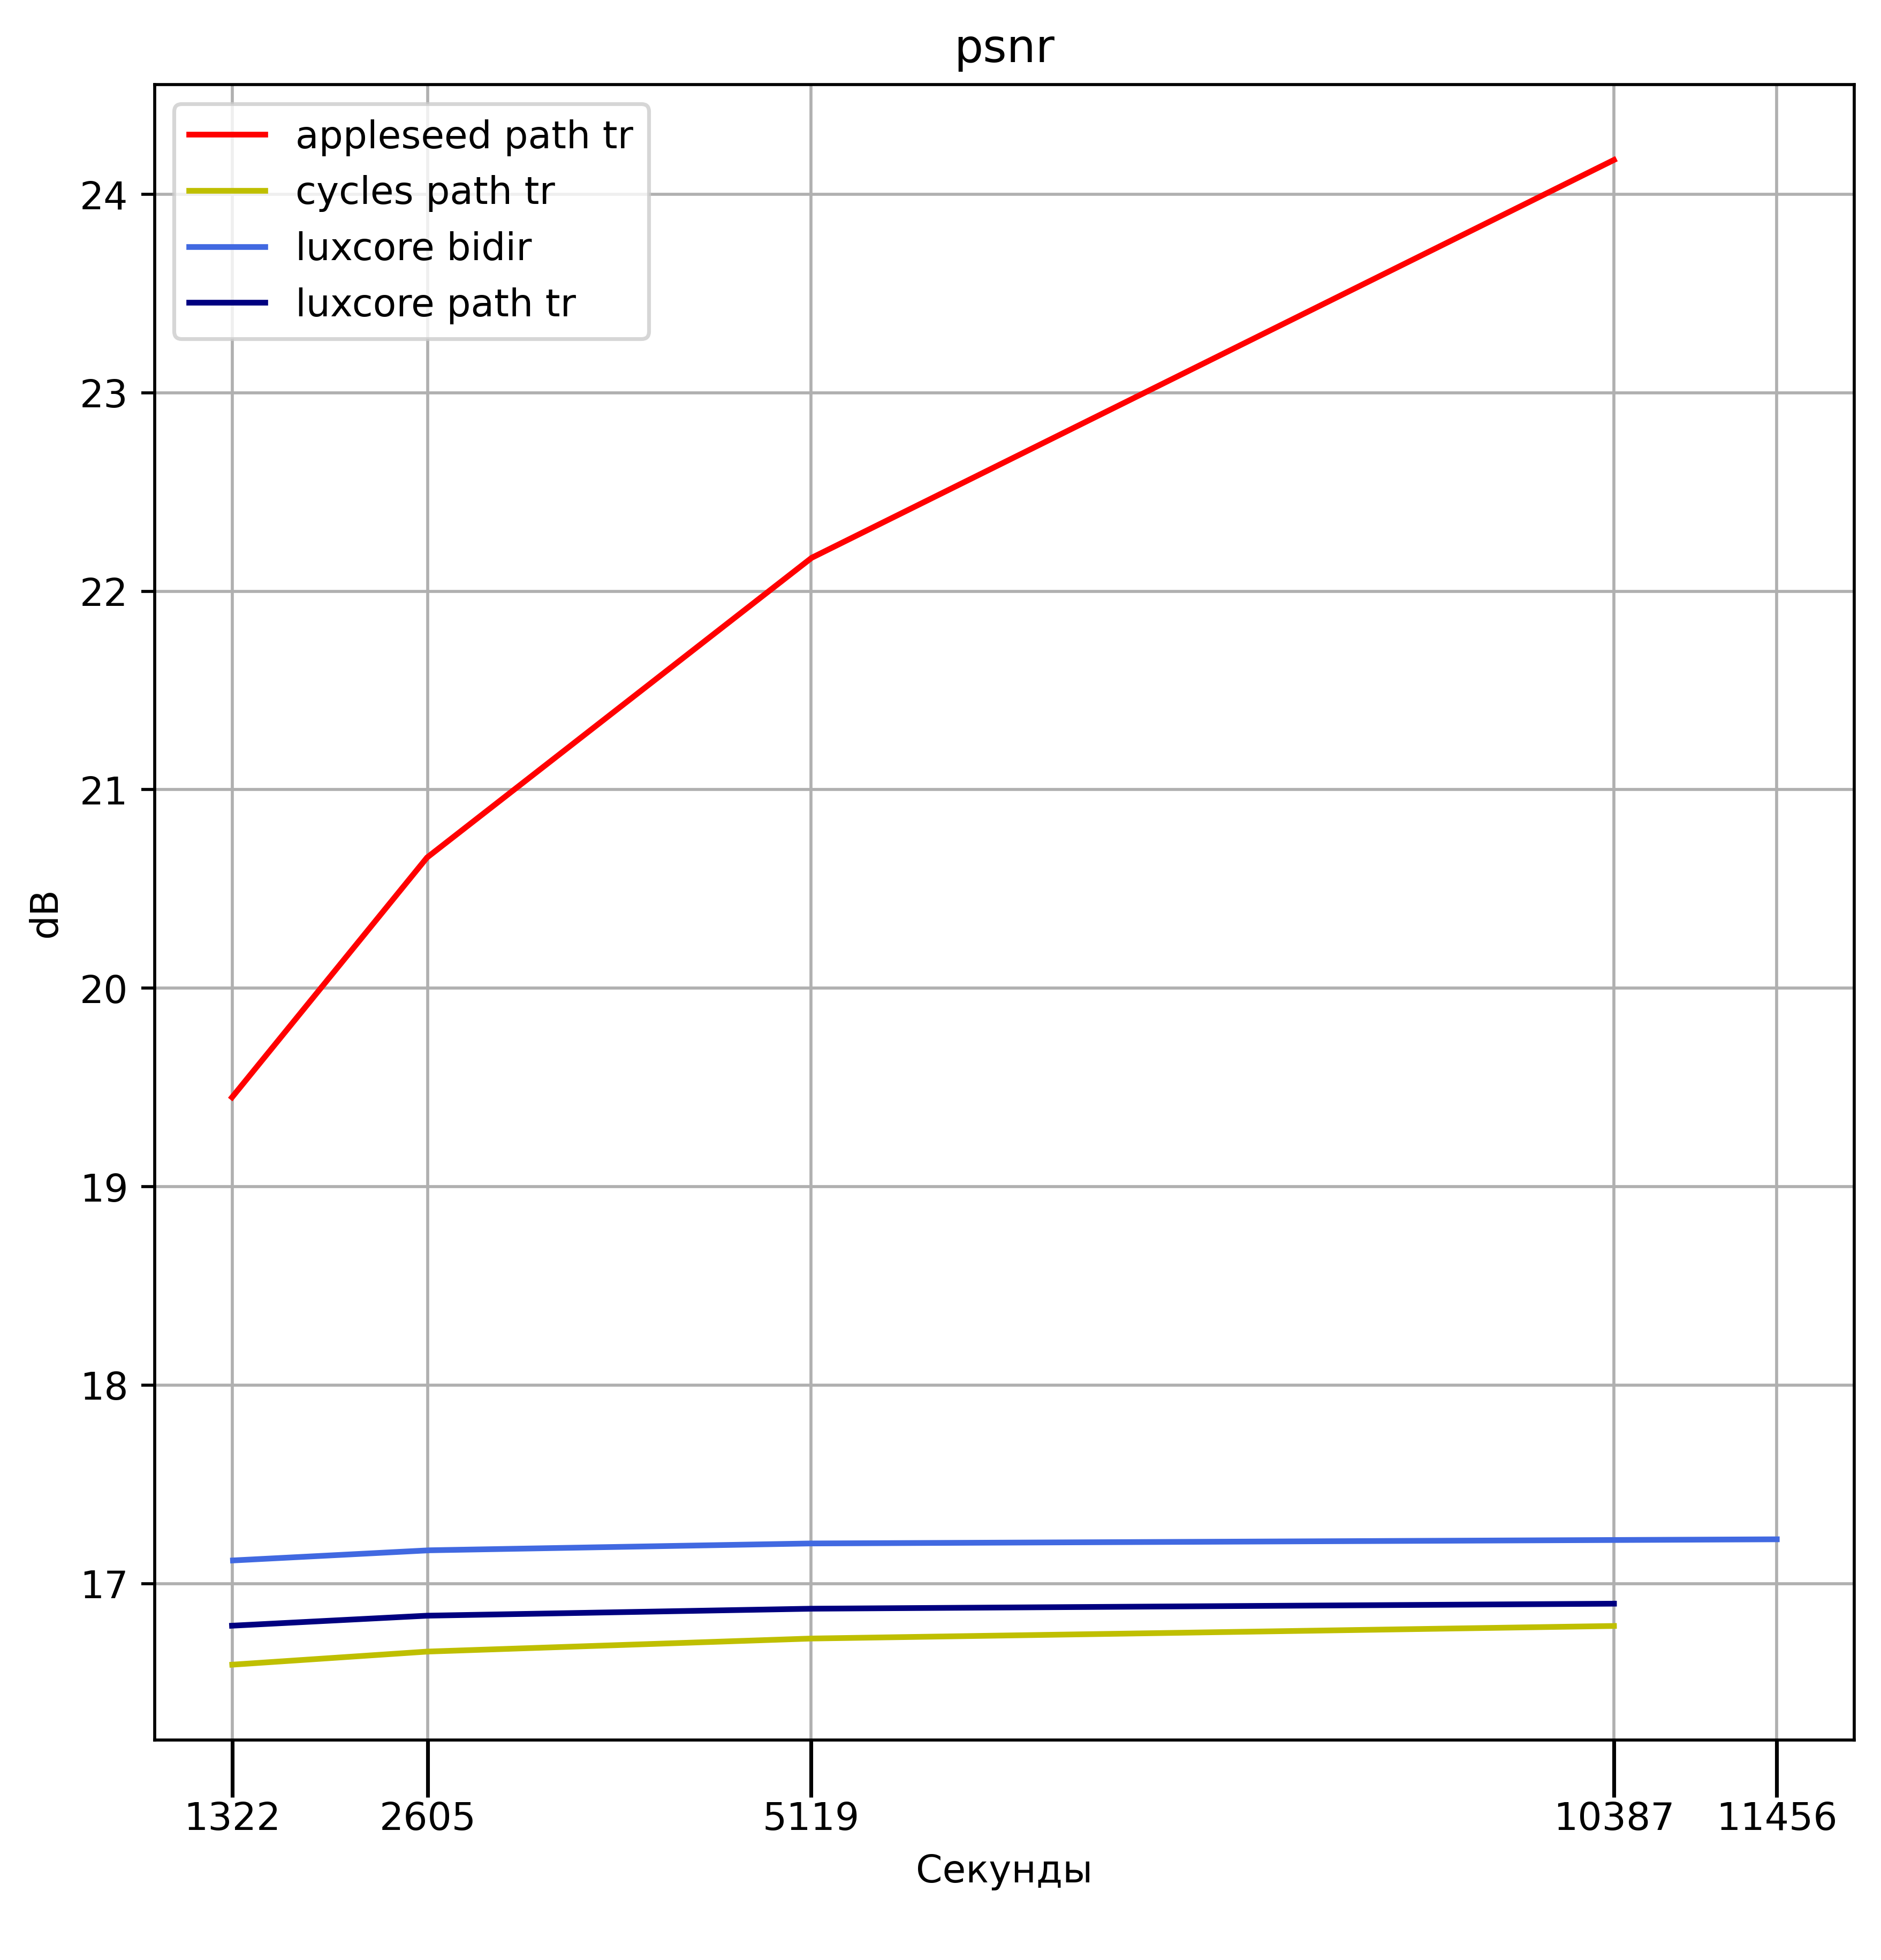

In [0]:
# appleseed --------------------------

C0_12psnr = []
for img in C0_12treads:
    img = hisEqulColor(img)
    C0_12psnr.append(metrics.peak_signal_noise_ratio(Cetalon, img))  

# cycles -------------------------------

C1_12psnr = []
for img in C1_12treads:
    img = hisEqulColor(img)
    C1_12psnr.append(metrics.peak_signal_noise_ratio(Cetalon, img))

"""
C1_12psnrLow = []
for img in C1_12treadsLow:
    img = hisEqulColor(img)
    C1_12psnrLow.append(metrics.peak_signal_noise_ratio(Cetalon, img)) """

# luxcore ------------------------------

C2_12psnrPath = []
for img in C2_12treadsPath:
    img = hisEqulColor(img)
    C2_12psnrPath.append(metrics.peak_signal_noise_ratio(Cetalon, img))  

C2_12psnrBidir = []
for img in C2_12treadsBidir:
    img = hisEqulColor(img)
    C2_12psnrBidir.append(metrics.peak_signal_noise_ratio(Cetalon, img))

# ================================================================================

plt.figure(num=None, figsize=(8, 8), dpi=512, facecolor='w', edgecolor='k')
ax = plt.subplot()

# appleseed
ax.plot(C0_12treadsTimes, C0_12psnr, color = 'r', label='appleseed path tr')


# cycles
ax.plot(C1_12treadsTimes, C1_12psnr, color = 'y', label='cycles path tr')
#ax.plot(C1_12treadsTimesLow, C1_12psnrLow, color = 'orange', label="cycles. low samples")


# luxcore
ax.plot(C2_12treadsTimesBidir, C2_12psnrBidir, color = 'royalblue', label='luxcore bidir')
ax.plot(C2_12treadsTimesPath, C2_12psnrPath, color = 'navy', label='luxcore path tr')

print('средняя скорость алгоритма:', '\nappleseed path tr:', psnrSpeed(C0_12psnr), '\ncycles path tr:', psnrSpeed(C1_12psnr))
print('luxcore bidir pt:', psnrSpeed(C2_12psnrBidir), '\nluxcore path tr:', psnrSpeed(C2_12psnrPath))

plt.legend()
ax.set(title='psnr')
#ax.set(title='procent')

plt.xlabel("Секунды\n")

ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 0)    #  Поворот подписей

plt.ylabel('dB')
#plt.ylabel('%')

meantime = []
for i in range(len(C0_12treadsTimes)-1):
    meantime.append(np.mean([C0_12treadsTimes[i], C1_12treadsTimes[i], C2_12treadsTimesBidir[i]]))
    #meantime.append(np.mean([C2_12treadsTimesPath[i], C2_12treadsTimesBidir[i]]))

plt.xticks(meantime + [C2_12treadsTimesPath[-1]] + [C2_12treadsTimesBidir[-1]])


#plt.xticks(sortTime)

#plt.yticks(np.sort(C1_12psnr[:-1] + C2_12psnrPath + C2_12psnrBidir))
#plt.yticks(C0_6_12_proc)


plt.grid()
plt.show()

#E_WATER POOL

'\nE2_12treadsBidir = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_401_12tr_1326.152.png", \n                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_789_12tr_2614.972.png", \n                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_1556_12tr_5111.92.png", \n                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_3145_12tr_ 11455.515.png" \n                                       ]]\n\nE2_12treadsTimesBidir = [1326.152, 2614.972, 5111.92, 11455.515]'

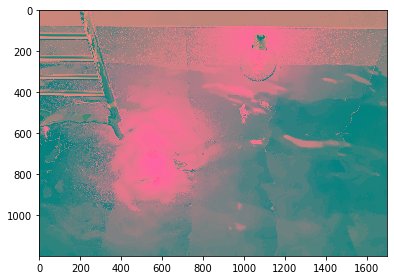

In [36]:
E0etalon = imread("/content/drive/My Drive/Диплом/E_waterPool/E0/12 tr/E0_65_12tr_3912.4801.png")
dst = cv2.fastNlMeansDenoisingColored(E0etalon, None, 4, 4, 11, 50)
E0etalon = hisEqulColor(dst)

imshow(hisEqulColor(dst, returnBRG = True))
#imsave(hisEqulColor(dst), "/content/drive/My Drive/Диплом/E_waterPool/E0/E0etalon.png")

E1etalon = imread("/content/drive/My Drive/Диплом/E_waterPool/E1/E1_etalon.png")
E1etalon = hisEqulColor(E1etalon)

E2etalon = imread("/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_962_12tr_3942.521.png")

dst = cv2.fastNlMeansDenoisingColored(E2etalon, None, 4, 4, 7, 21)
E2etalon = hisEqulColor(dst)

img = hisEqulColor(dst, returnBRG = True)
#imsave(img, "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2etalon.png")

# E0 appleseed 6 treads 
'''
E0_6treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/"
                                  ]]

E0_6treadsTimes = []'''

# E0 appleseed 12 treads

E0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/E_waterPool/E0/12 tr/E0_7_12tr_428.722.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E0/12 tr/E0_17_12tr_1023.72.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E0/12 tr/E0_34_12tr_2053.4061.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E0/12 tr/E0_65_12tr_3912.4801.png"
                                   ]]

E0_12treadsTimes = [428.722, 1023.72, 2053.4061, 3912.4801]

# -----------------------------------------------------------------------------------------------------------
#
# E1 Cycles 6 treads
'''

# изображения с меньшим кол-вом итераций
E1_12treadsLow = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_170_12tr_183.381.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_334_12tr_354.2279.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_658_12tr_691.2025.png", 
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/С1_1265_12tr_1302.165.png",
                                      "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C1_Cycles/12 treads/C1_1335_12tr_1393.2081.png"
                                     ]]

E1_12treadsTimesLow = [183.381, 354.2279, 691.2025, 1302.165, 1393.2081] '''

# E1 Cycles 12 treads
E1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_24_12tr__425.331.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_60_12tr_1057.498.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_120_12tr_2087.793.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_229_12tr_4004.124.png" 
                                  ]]

E1_12treadsTimes = [425.331, 1057.498, 2087.793, 4004.124]


# -----------------------------------------------------------------------------------------------------------
#
# E2 Luxcore 6 treads
'''
E2_6treads = [imread(i) for i in [""/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/", 
                                  "/content/drive/My Drive/Диплом/"
                                 ]]

E2_6treadsTimes = [] '''

# B2 Luxcore 12 treads
E2_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_100_12tr_426.5060.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_250_12tr_1056.231.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_500_12tr_2082.293.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_962_12tr_3942.521.png" 
                                  ]]

E2_12treadsTimes = [426.5060, 1056.231, 2082.293, 3942.521]

'''
E2_12treadsBidir = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_401_12tr_1326.152.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_789_12tr_2614.972.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_1556_12tr_5111.92.png", 
                                        "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C2_LuxCore/12 treads bidir/С2_3145_12tr_ 11455.515.png" 
                                       ]]

E2_12treadsTimesBidir = [1326.152, 2614.972, 5111.92, 11455.515]'''

средняя скорость алгоритма: 
appleseed path tr: 2.2785979558069003
cycles path tr: 1.3710278719544438 
luxcore path tr: 1.9626282569508184


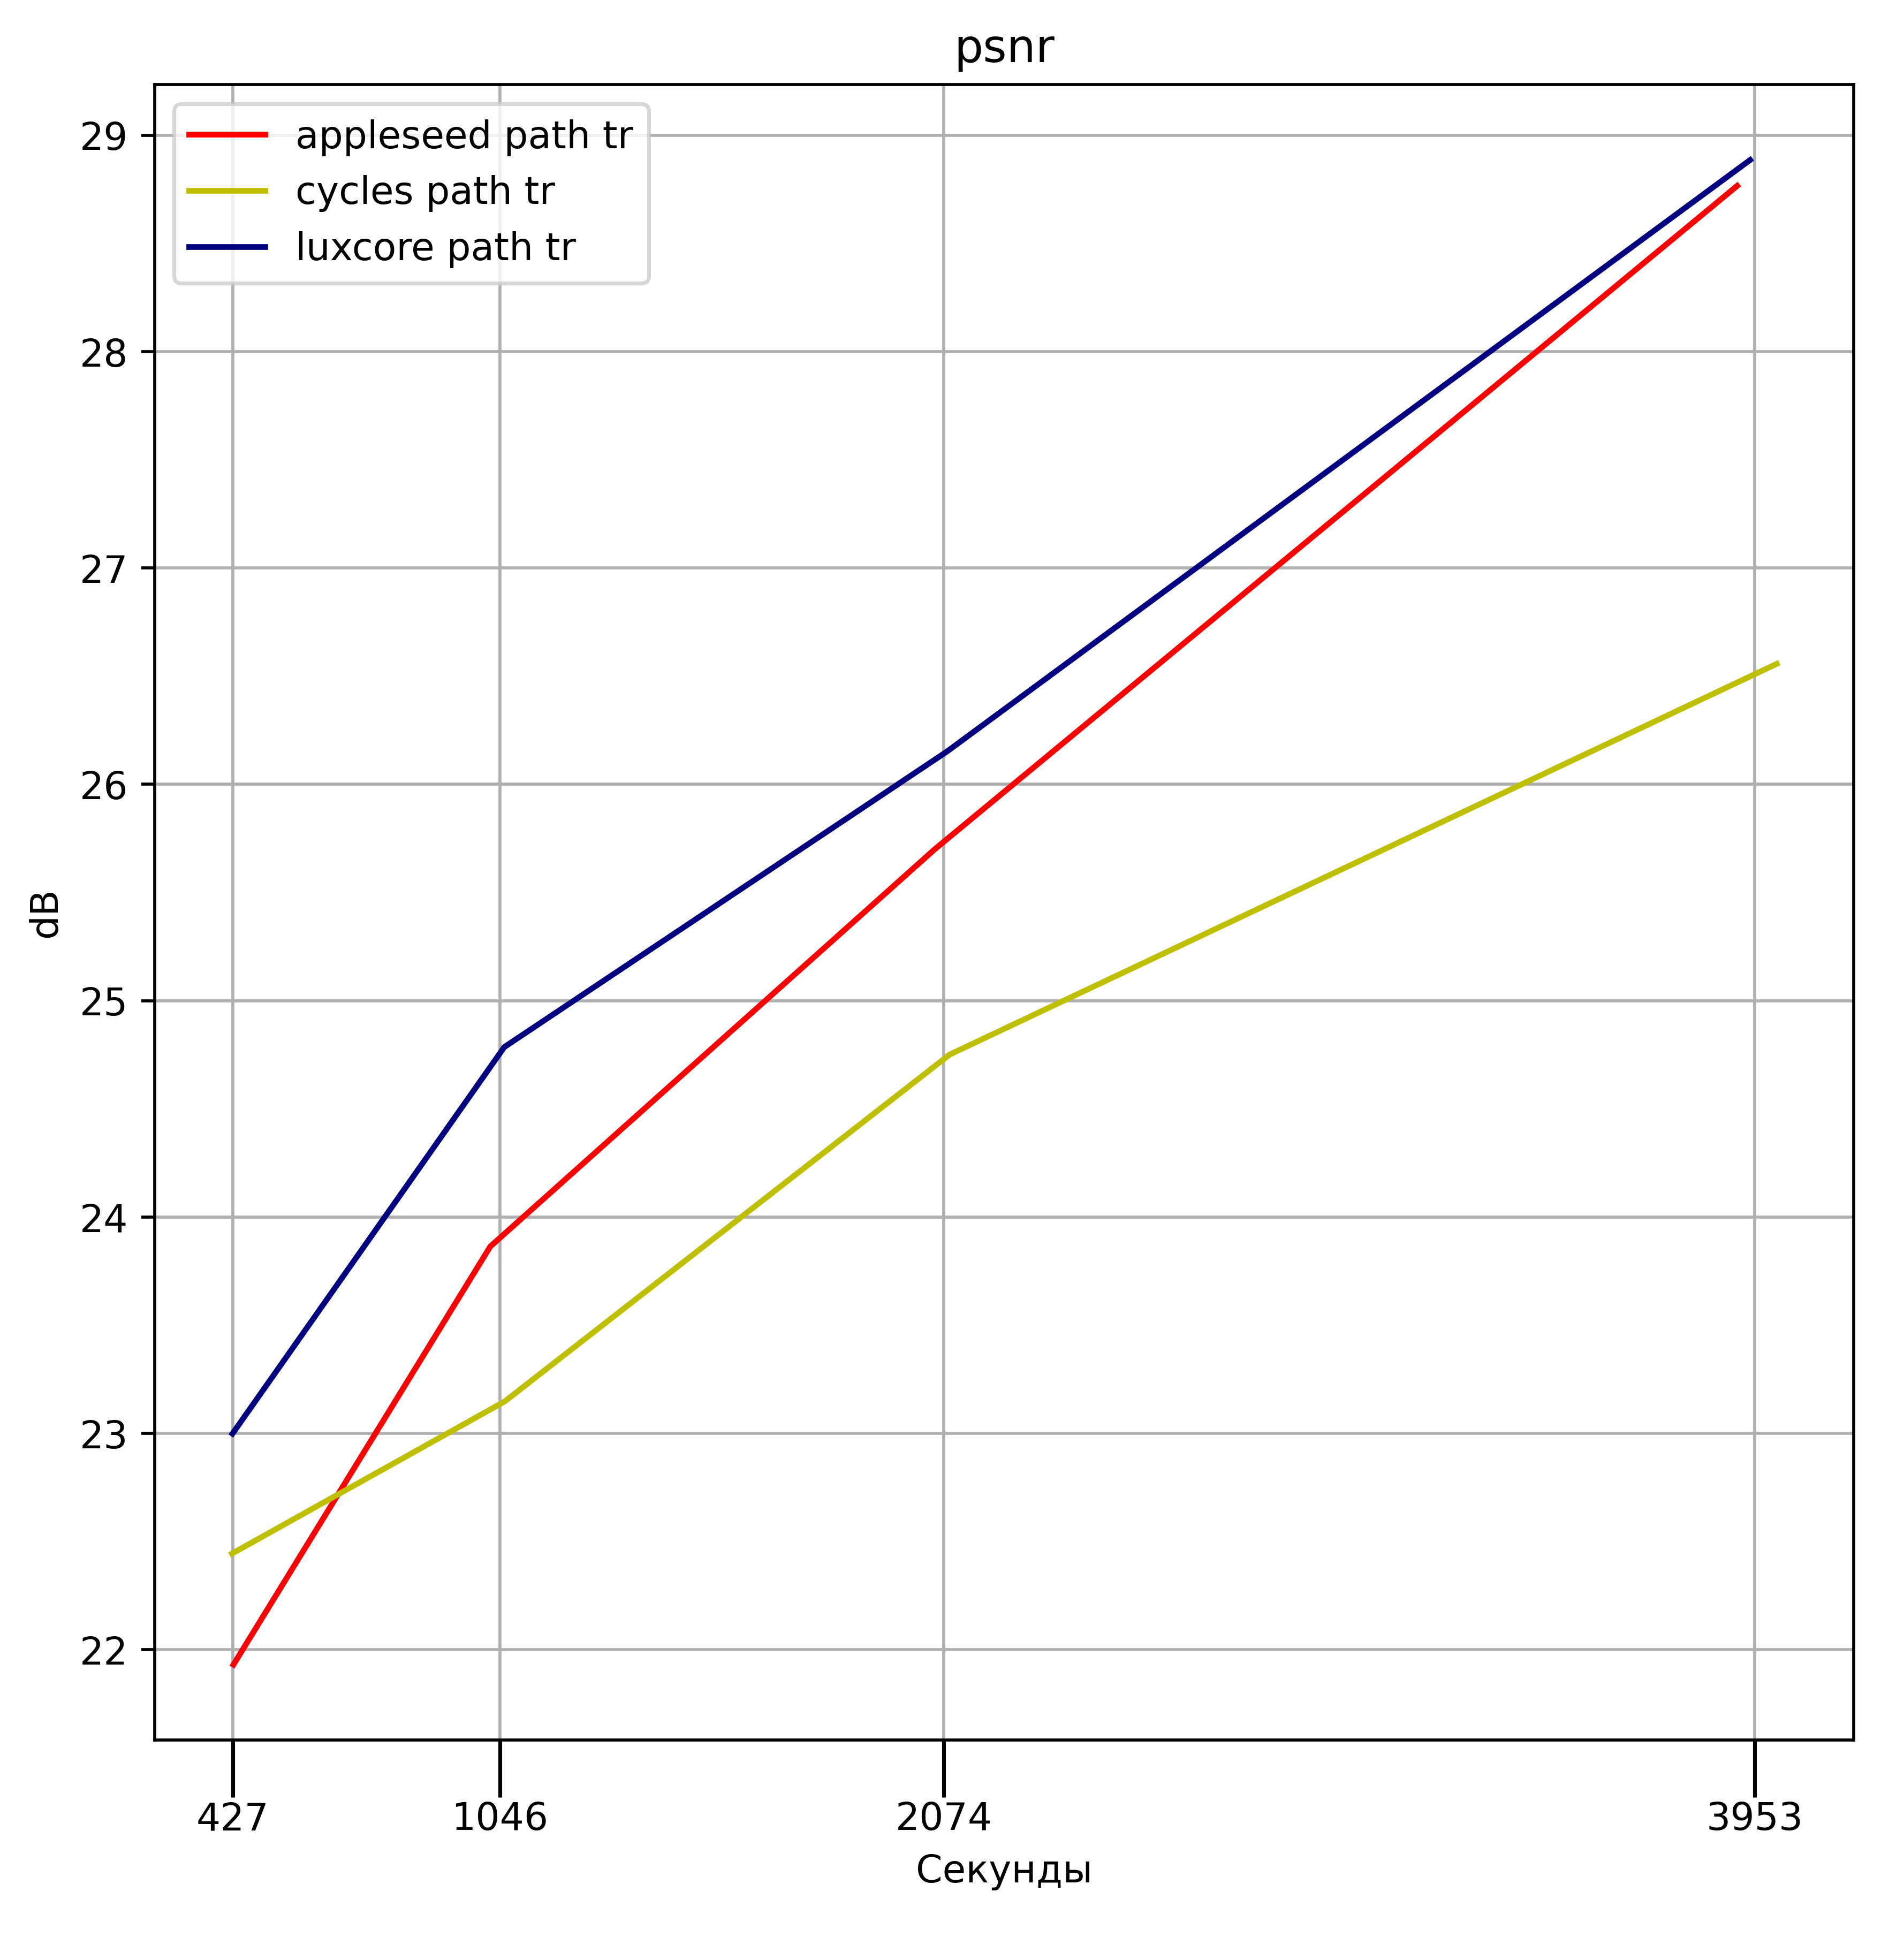

In [24]:
# appleseed --------------------------

E0_12psnr = []
for img in E0_12treads:
    img = hisEqulColor(img)
    E0_12psnr.append(metrics.peak_signal_noise_ratio(E0etalon, img))  

# cycles -------------------------------

E1_12psnr = []
for img in E1_12treads:
    img = hisEqulColor(img)
    E1_12psnr.append(metrics.peak_signal_noise_ratio(E1etalon, img))

"""
E1_12psnrLow = []
for img in E1_12treadsLow:
    img = hisEqulColor(img)
    E1_12psnrLow.append(metrics.peak_signal_noise_ratio(Eetalon, img)) """

# luxcore ------------------------------

E2_12psnr = []
for img in E2_12treads:
    img = hisEqulColor(img)
    E2_12psnr.append(metrics.peak_signal_noise_ratio(E2etalon, img))  

# ================================================================================

plt.figure(num=None, figsize=(8, 8), dpi=512, facecolor='w', edgecolor='k')
ax = plt.subplot()

# appleseed
ax.plot(E0_12treadsTimes, E0_12psnr, color = 'r', label='appleseed path tr')

# cycles
ax.plot(E1_12treadsTimes, E1_12psnr, color = 'y', label='cycles path tr')
#ax.plot(C1_12treadsTimesLow, C1_12psnrLow, color = 'orange', label="cycles. low samples")

# luxcore
ax.plot(E2_12treadsTimes, E2_12psnr, color = 'navy', label='luxcore path tr')

print('средняя скорость алгоритма:', '\nappleseed path tr:', psnrSpeed(E0_12psnr))
print('cycles path tr:', psnrSpeed(E1_12psnr), '\nluxcore path tr:', psnrSpeed(E2_12psnr))

plt.legend()
ax.set(title='psnr')
#ax.set(title='procent')

plt.xlabel("Секунды\n")

ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 0)    #  Поворот подписей

plt.ylabel('dB')
#plt.ylabel('%')

meantime = []
for i in range(len(E0_12treadsTimes)):
    meantime.append(np.mean([E0_12treadsTimes[i], E1_12treadsTimes[i], E2_12treadsTimes[i]]))
    #meantime.append(np.mean([E2_12treadsTimesPath[i], E2_12treadsTimesBidir[i]]))

plt.xticks(meantime) # + [E2_12treadsTimesPath[-1]] + [E2_12treadsTimesBidir[-1]])


#plt.xticks(sortTime)

#plt.yticks(np.sort(E1_12psnr[:-1] + E2_12psnrPath + E2_12psnrBidir))
#plt.yticks(E0_6_12_proc)


plt.grid()
plt.show()

In [0]:
img_table
img_table.to_excel("img_table.xlsx")


###Получение данных из таблицы img_table

In [0]:
m_time = img_table[img_table[img_table['scene number'] == "A"]['render'] == "appleseed"]['rendering time']
m_psnr = img_table[img_table[img_table['scene number'] == "A"]['render'] == "appleseed"]['psnr']

###Шаблон для рисования графика для appleseed

In [0]:

Eetalon = imread("/content/drive/My Drive/Диплом/")
Eetalon = hisEqulColor(Eetalon)

#dst = hisEqulColor(Cetalon)
#Cetalon = cv2.fastNlMeansDenoisingColored(dst, None, 5, 5, 7, 21)

# E0 appleseed 12 treads 

C0_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_5_12tr_ 1319.8860.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_10_12tr_2599.369.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_20_12tr_5122.735.png", 
                                   "/content/drive/My Drive/Диплом/C_tranclucent_curtains/C0_appleseed/12 treads/C0_40_12tr_10386.971.png"
                                   ]]

C0_12treadsTimes = []

# -----------------------------------------------------------------------------------------------------------
#
# E1 Cycles 12 treads
E1_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_24_12tr__425.331.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_60_12tr_1057.498.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_120_12tr_2087.793.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E1/12 tr/E1_229_12tr_4004.124.png" 
                                  ]]

E1_12treadsTimes = [425.331, 1057.498, 2087.793, 4004.124]


# -----------------------------------------------------------------------------------------------------------
#
# E2 Luxcore 12 treads
E2_12treads = [imread(i) for i in ["/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_100_12tr_426.5060.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_250_12tr_1056.231.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_500_12tr_2082.293.png", 
                                   "/content/drive/My Drive/Диплом/E_waterPool/E2/12 treads/E2_962_12tr_3942.521.png" 
                                  ]]

E2_12treadsTimes = [426.506, 1056.231, 2082.293, 3942.521]


###Шаблон для рисования графика для cycles

In [0]:
m_time = img_table[img_table[img_table['scene number'] == "A"]['render'] == "cycles"]['rendering time']
m_psnr = img_table[img_table[img_table['scene number'] == "A"]['render'] == "cycles"]['psnr']

plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.plot(m_time, m_psnr, color = 'y', label="cycles")
plt.legend()
ax.set(title='psnr')


plt.xlabel("seconds\nРисунок 3. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(m_time)
plt.ylabel("dB")
plt.yticks(m_psnr)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()

plt.show()

#SSIM

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.set(title='ssim')
ax.plot(A1_times, A1_ssim, color = 'y', label="Cycles")
plt.legend()
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длина делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 90)    #  Поворот подписей
ax.tick_params(axis = 'y', labelsize = 6, labelrotation = 10)    #  Поворот подписей

plt.xlabel("seconds")
plt.xticks(A1_times)
plt.ylabel("")
plt.yticks(A1_ssim)
plt.grid()
plt.show()

###Шаблон для рисования графика для luxcore

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 4. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(A3_times)
plt.ylabel("dB")
plt.yticks(A3_psnr)
plt.grid()

plt.show()

#Общий график psnr

In [0]:



plt.figure(num=None, figsize=(7, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='PSNR')

ax.plot(A1_times[:-1], A1_psnr[:-1], color = 'y', label="cycles")
ax.plot(A0_times, A0_psnr, color = 'r', label="appleseed")
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()


plt.xlabel("seconds\nРисунок 15. Зависимость качества от скорости в секундах всех рендеров на 1-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(A3_times)
plt.ylabel("dB")
#plt.yticks(A3_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(4, 7), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(A1_times[:-1], A1_psnr[:-1], color = 'y', label="Cycles")
ax.plot(A2_times, A2_psnr, color = 'r', label="yafaray")
ax.plot(A3_times, A3_psnr, color = 'b', label="luxcore")
plt.legend()


plt.xlabel("seconds")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(A2_times)
plt.ylabel("dB")
#plt.yticks(A3_ssim)
plt.grid()

plt.show()

In [0]:
Bimg = imread("/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 14971.590.png")
Bimg = hisEqulColor(Bimg)
imshow(Bimg)

In [0]:
Bimg = imread("/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 14971.590.png")
Bimg = hisEqulColor(Bimg)
imshow(Bimg)

B0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_1317.898.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_ 1741.154.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_2561.235.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_3611.974.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_5524.962.png",
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_7405.376.png",
                                 "/content/drive/My Drive/Диплом/B_Bottles1/0_appleseed/A_time_10710.281.png"]]

B0_times = [1317.898, 1741.154, 2561.235, 3611.974, 5524.962, 7405.376, 10710.281]
B0_psnr=[]
B0_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B0_images:
  img = hisEqulColor(img)
  B0_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B0_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()

ax.plot(B0_times, B0_psnr, color = 'r', label="appleseed")
plt.legend()
ax.set(title='psnr')

plt.xlabel("seconds\nРисунок 6. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'black',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей

plt.xticks(B0_times)
plt.ylabel("dB")
plt.yticks(B0_psnr)
#ax.yaxis.set_major_locator(ticker.IndexLocator(0, ))
plt.grid()

plt.show()

In [0]:

B1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_1568,717.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_3109,822.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_6319,124.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/1_Cycles/B1_12627,391.png"]]
B1_times = [1568.717, 3109.822, 6319.124, 12627.391]
B1_psnr=[]
B1_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B1_images:
  img = hisEqulColor(img)
  B1_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B1_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B1_times, B1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 7. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B1_times)
plt.ylabel("dB")
plt.yticks(B1_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='ssim')
ax.plot(B1_times, B1_ssim, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B1_times)
plt.ylabel("dB")
plt.yticks(B1_ssim)
plt.grid()

plt.show()

#LuxCore

In [0]:


B3_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_1303,938.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_2642,678.png", 
                                 "/content/drive/My Drive/Диплом/B_Bottles1/3_LuxCore/A3_5586,0458.png"]]
B3_times = [1303.938, 2642.678, 5586.0458]
B3_psnr=[]
B3_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in B3_images:
  img = hisEqulColor(img)
  B3_psnr.append(measure.compare_psnr(Bimg, img, data_range=None))
  #B3_ssim.append(measure.compare_ssim(Bimg, img, multichannel=True))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B3_times, B3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 8. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(B3_times)
plt.ylabel("dB")
plt.yticks(B3_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(B0_times[:-2], B0_psnr[:-2], color = 'r', label="appleseed")
ax.plot(B1_times[:-1], B1_psnr[:-1], color = 'y', label="cycles")
ax.plot(B3_times, B3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 16. Зависимость качества от скорости в секундах всех рендеров на 2-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()

In [0]:
Cimg = imread("/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_9396.147.png")
Cimg = hisEqulColor(Cimg)
imshow(Cimg)

In [0]:
C0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_1480.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_2916.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/0_appleseed/C2_5727.png" ]]

C0_times = [1480.167, 2916.739, 5727.149]
C0_psnr = []
C0_ssim = []

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C0_images:
  img = hisEqulColor(img)
  C0_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))
  #C0_ssim.append(measure.compare_ssim(Cimg, img, multichannel=True))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
plt.legend()

plt.xlabel("seconds\nРисунок 14. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C0_times)
plt.ylabel("dB")
plt.yticks(C0_psnr)
plt.grid()

plt.show()

In [0]:
C1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_625.035.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_ 1247.409.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_2507.067.png", 
                                 "/content/drive/My Drive/Диплом/c_exp_tranc_curt/1_Cycles/С1.2_curt_5001.764.png"]] 

C1_times = [625.035, 1247.409, 2507.067, 5001.764]
C1_psnr=[]
C1_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C1_images:
  img = hisEqulColor(img)
  C1_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 13. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C1_times)
plt.ylabel("dB")
plt.yticks(C1_psnr)
plt.grid()

plt.show()

In [0]:

C3_images=[imread(i) for i in ["/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_1168.322.png", 
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_1714.233.png", 
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_2375.825.png",
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_4579.764.png",
                               "/content/drive/My Drive/Диплом/c_exp_tranc_curt/3_LuxCore/C3.2_time_6818.563.png"]] 

C3_times = [1168.322, 1714.233, 2375.825, 4579.764, 6818.563]
C3_psnr=[]
C3_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C3_images:
  img = hisEqulColor(img)
  C3_psnr.append(measure.compare_psnr(Cimg, img, data_range=None))

print(C3_psnr)

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 12. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C3_times)
plt.ylabel("dB")
plt.yticks(C3_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 18. Зависимость качества всех рендеров от скорости в секундах на 4-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()

In [0]:
C2img = imread("/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_37625.399.png")
C2img = hisEqulColor(C2img)
imshow(C2img)

In [0]:

c0_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_1925.108.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_ 4815.922.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_6327.36.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/0_appleseed/С0_curt_18980.577.png",
                                ]]

c0_times = [1925.108, 4815.922, 6327.36, 18980.577]
c0_psnr=[]
c0_ssim=[]

# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C0_images:
  img = hisEqulColor(img)
  C0_psnr.append(measure.compare_psnr(C2img, img, data_range=None))
  #C0_ssim.append(measure.compare_ssim(C2img, img, multichannel=True))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
plt.legend()

plt.xlabel("seconds\nРисунок 9. Зависимость качества appleseed от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C0_times)
plt.ylabel("dB")
plt.yticks(C0_psnr)
plt.grid()

plt.show()

In [0]:
с3_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_1708.795.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_3649.661.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_ 7304.413.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/3_LuxCore/C3_time_14741.714.png"]] 

с3_times = [1708.795, 3649.661, 7304.413, 14741.714]
с3_psnr=[]
с3_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C3_images:
  img = hisEqulColor(img)
  C3_psnr.append(measure.compare_psnr(C2img, img, data_range=None))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 10. Зависимость качества luxcore от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C3_times)
plt.ylabel("dB")
plt.yticks(C3_psnr)
plt.grid()

plt.show()

In [0]:


с1_images = [imread(i) for i in ["/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_1889.7217.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_3800.386.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_7654.851.png", 
                                 "/content/drive/My Drive/Диплом/C_tranclucent_curtains/1_Cycles/С1_curt_15177.85.png"]] 

с1_times = [1889.722, 3800.386, 7654.851, 15177.85]
C1_psnr=[]
C1_ssim=[]


# skimage.measure.compare_psnr(im_true, im_test, data_range=None); skimage.measure.compare_ssim(im_true, im_test, multichannel=True)
for img in C1_images:
  img = hisEqulColor(img)
  C1_psnr.append(measure.compare_psnr(C2img, img, data_range=None))

In [0]:
plt.figure(num=None, figsize=(10, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
plt.legend()

plt.xlabel("seconds\nРисунок 11. Зависимость качества cycles от скорости в секундах")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
plt.xticks(C1_times)
plt.ylabel("dB")
plt.yticks(C1_psnr)
plt.grid()

plt.show()

In [0]:
plt.figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
ax = plt.subplot()
ax.set(title='psnr')
ax.plot(C0_times, C0_psnr, color = 'r', label="appleseed")
ax.plot(C1_times, C1_psnr, color = 'y', label="cycles")
ax.plot(C3_times, C3_psnr, color = 'b', label="luxcore")
plt.legend()

plt.xlabel("seconds\nРисунок 17. Зависимость качества всех рендеров от скорости в секундах на 3-й модели")
ax.tick_params(axis = 'x',    #  Применяем параметры к обеим осям
               which = 'major',    #  Применяем параметры к основным делениям
               direction = 'out',    #  Рисуем деления внутри и снаружи графика
               length = 15,    #  Длинна делений
               width = 1,     #  Ширина делений
               color = 'b',    #  Цвет делений
               pad = 1,    #  Расстояние между черточкой и ее подписью
               labelsize = 10,    #  Размер подписи
               # labelcolor = 'r',    #  Цвет подписи
               bottom = True,    #  Рисуем метки снизу
               top = False,    #   сверху
               left = True,    #  слева
               right = False,    #  и справа
               #labelbottom = True,    #  Рисуем подписи снизу
               #labeltop = True,    #  сверху
               #labelleft = True,    #  слева
               #labelright = True,    #  и справа
               labelrotation = 75)    #  Поворот подписей
#plt.xticks(B3_times)
plt.ylabel("dB")
#plt.yticks(B3_psnr)
plt.grid()

plt.show()